In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import bme680 as bm

class GroveBME680(object):
    def __init__(self):
        snr = bm.BME680(bm.I2C_ADDR_PRIMARY)

        # over sample, make data more accuracy
        snr.set_humidity_oversample(bm.OS_2X)
        snr.set_pressure_oversample(bm.OS_4X)
        snr.set_temperature_oversample(bm.OS_8X)
        snr.set_filter(bm.FILTER_SIZE_3)
        snr.set_gas_status(bm.ENABLE_GAS_MEAS)

        # profile # 0
        snr.set_gas_heater_temperature(320)
        snr.set_gas_heater_duration(150)
        snr.select_gas_heater_profile(0)

        # profile # 1
        # snr.set_gas_heater_profile(200, 150, nb_profile=1)
        # snr.select_gas_heater_profile(1)

        # Initial reading
        snr.get_sensor_data()
        snr.get_sensor_data()

        self.snr = snr

    def read(self):
        if self.snr.get_sensor_data():
            return self.snr.data
        return None


In [3]:
def animate(frame, sensor, tempPlot, pressurePlot, humidityPlot, gasPlot, x, y):
    
    #read temp from grove sensor
    data = sensor.read()
    
    if data and data.heat_stable:
        
        #append data to x and y lists
        x.append(datetime.now().strftime("%d"))
        y["temp"].append(data.temperature)
        y["pressure"].append(data.pressure)
        y["humidity"].append(data.humidity)
        y["gas"].append(data.gas_resistance)
        
        #limit x and y axis to 20 items to plot
        x = x[-20:]
        y["temp"] = y["temp"][-20:]
        y["pressure"] = y["pressure"][-20:]
        y["humidity"] = y["humidity"][-20:]
        y["gas"] = y["gas"][-20:]
        
        #test uncomment
        # tempPlot.clear()
        # pressurePlot.clear()
        # humidityPlot.clear()
        # gasPlot.clear()
        
        tempPlot.plot(x, y["temp"], "r")
        pressurePlot.plot(x, y["pressure"], "g")
        humidityPlot.plot(x, y["humidity"], "b")
        gasPlot.plot(x, y["gas"], "k")
        
        
    

    
    

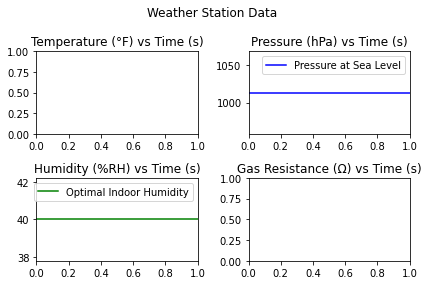

In [8]:

fig = plt.figure()
fig.suptitle("Weather Station Data")
tempPlot = fig.add_subplot(221)
pressurePlot = fig.add_subplot(222)
humidityPlot = fig.add_subplot(223)
gasPlot = fig.add_subplot(224)


tempPlot.set_title("Temperature (°F) vs Time (s)")
pressurePlot.set_title("Pressure (hPa) vs Time (s)")
humidityPlot.set_title("Humidity (%RH) vs Time (s)")
gasPlot.set_title("Gas Resistance (Ω) vs Time (s)")

#atmospheric pressure at sealevel for reference
pressurePlot.axhline(y=1013.25, color='blue')
pressurePlot.legend(["Pressure at Sea Level", "Current Pressure"])

humidityPlot.axhline(y=40, color='g')
humidityPlot.legend(["Optimal Indoor Humidity", "Current Humidity"])
x = []
y = {
    "temp": [],
    "pressure": [], 
    "humidity": [],
    "gas": [],
}


fig.tight_layout()
# tempPlot.set_xticks([])
# pressurePlot.set_xticks([])
# humidityPlot.set_xticks([])
# gasPlot.set_xticks([])


    
    

In [5]:
sensor = GroveBME680()
ani = animation.FuncAnimation(fig, animate, fargs=(sensor, tempPlot, pressurePlot, humidityPlot, gasPlot, x, y), interval = 500)
plt.show()

NameError: name 'GroveBME680' is not defined